In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
'''This notebook takes the existing Caltrain timetables from the GTFS data,
processes them to hourly summaries, and exports to CSV'''

'This notebook takes the existing Caltrain timetables from the GTFS data,\nprocesses them to hourly summaries, and exports to CSV'

In [9]:
df_stop_times = pd.read_csv('../data/CT-GTFS/stop_times.txt')

In [10]:
df_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,start_service_area_id,end_service_area_id,start_service_area_radius,end_service_area_radius,continuous_pickup,continuous_drop_off,pickup_area_id,drop_off_area_id,pickup_service_area_radius,drop_off_service_area_radius
0,305,5:45:00,5:45:00,70261,1,NaN,0,0,0.000000,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
1,305,6:01:00,6:01:00,70211,2,NaN,0,0,17498.983969,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
2,305,6:09:00,6:09:00,70171,3,NaN,0,0,27096.416007,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
3,305,6:19:00,6:19:00,70111,4,NaN,0,0,42877.377318,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
4,305,6:28:00,6:28:00,70061,5,NaN,0,0,53641.841148,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN


In [11]:
df_stops = pd.read_csv('../data/CT-GTFS/stops.txt')

In [12]:
df_stops.head()

,stop_id,stop_code,platform_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,position,direction,wheelchair_boarding
0,70011,70011,NaN,San Francisco Caltrain,NaN,37.776390,-122.394992,2275.0,NaN,0,NaN,America/Los_Angeles,NaN,NaN,1
1,70012,70012,NaN,San Francisco Caltrain,NaN,37.776348,-122.394935,2275.0,NaN,0,NaN,America/Los_Angeles,NaN,NaN,1
2,70021,70021,NaN,22nd Street Caltrain,NaN,37.757599,-122.391880,2275.0,NaN,0,NaN,America/Los_Angeles,NaN,NaN,2
3,70022,70022,NaN,22nd Street Caltrain,NaN,37.757583,-122.392404,2275.0,NaN,0,NaN,America/Los_Angeles,NaN,NaN,2
4,70031,70031,NaN,Bayshore Caltrain,NaN,37.709537,-122.401586,2275.0,NaN,0,NaN,America/Los_Angeles,NaN,NaN,1


In [13]:
df_trips = pd.read_csv('../data/CT-GTFS/trips.txt')

In [14]:
df_trips.head()

,route_id,service_id,trip_id,trip_short_name,trip_headsign,direction_id,block_id,shape_id,bikes_allowed,wheelchair_accessible,trip_type,drt_max_travel_time,drt_avg_travel_time,drt_advance_book_min,drt_pickup_message,drt_drop_off_message,continuous_pickup_message,continuous_drop_off_message
0,12867,c_16869_b_19500_d_31,309,309,San Francisco Caltrain Station,0,NaN,p_692621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12867,c_16869_b_19500_d_31,319,319,San Francisco Caltrain Station,0,NaN,p_692621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12867,c_16869_b_19500_d_31,329,329,San Francisco Caltrain Station,0,NaN,p_692621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12867,c_16869_b_19500_d_31,371,371,San Francisco Caltrain Station,0,NaN,p_692597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12867,c_16869_b_19500_d_31,381,381,San Francisco Caltrain Station,0,NaN,p_692597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df_stop_times.merge(df_stops, on='stop_id').merge(df_trips, on='trip_id')

In [16]:
df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,bikes_allowed,wheelchair_accessible,trip_type,drt_max_travel_time,drt_avg_travel_time,drt_advance_book_min,drt_pickup_message,drt_drop_off_message,continuous_pickup_message,continuous_drop_off_message
0,305,5:45:00,5:45:00,70261,1,NaN,0,0,0.000000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,305,6:01:00,6:01:00,70211,2,NaN,0,0,17498.983969,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,305,6:09:00,6:09:00,70171,3,NaN,0,0,27096.416007,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,305,6:19:00,6:19:00,70111,4,NaN,0,0,42877.377318,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,305,6:28:00,6:28:00,70061,5,NaN,0,0,53641.841148,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 2347
Data columns (total 51 columns):
trip_id                         2348 non-null object
arrival_time                    2348 non-null object
departure_time                  2348 non-null object
stop_id                         2348 non-null int64
stop_sequence                   2348 non-null int64
stop_headsign                   2054 non-null object
pickup_type                     2348 non-null int64
drop_off_type                   2348 non-null int64
shape_dist_traveled             2348 non-null float64
timepoint                       2348 non-null int64
start_service_area_id           0 non-null float64
end_service_area_id             0 non-null float64
start_service_area_radius       0 non-null float64
end_service_area_radius         0 non-null float64
continuous_pickup               2348 non-null int64
continuous_drop_off             2348 non-null int64
pickup_area_id                  0 non-null float64
drop_off

In [18]:
#Filter to weekdays
df = df[df['service_id'] == 'c_16869_b_19500_d_31']

In [23]:
df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,bikes_allowed,wheelchair_accessible,trip_type,drt_max_travel_time,drt_avg_travel_time,drt_advance_book_min,drt_pickup_message,drt_drop_off_message,continuous_pickup_message,continuous_drop_off_message
0,305,5:45:00,5:45:00,70261,1,NaN,0,0,0.000000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,305,6:01:00,6:01:00,70211,2,NaN,0,0,17498.983969,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,305,6:09:00,6:09:00,70171,3,NaN,0,0,27096.416007,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,305,6:19:00,6:19:00,70111,4,NaN,0,0,42877.377318,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,305,6:28:00,6:28:00,70061,5,NaN,0,0,53641.841148,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 2303
Data columns (total 51 columns):
trip_id                         1482 non-null object
arrival_time                    1482 non-null object
departure_time                  1482 non-null object
stop_id                         1482 non-null int64
stop_sequence                   1482 non-null int64
stop_headsign                   1188 non-null object
pickup_type                     1482 non-null int64
drop_off_type                   1482 non-null int64
shape_dist_traveled             1482 non-null float64
timepoint                       1482 non-null int64
start_service_area_id           0 non-null float64
end_service_area_id             0 non-null float64
start_service_area_radius       0 non-null float64
end_service_area_radius         0 non-null float64
continuous_pickup               1482 non-null int64
continuous_drop_off             1482 non-null int64
pickup_area_id                  0 non-null float64
drop_off

In [25]:
#This converts the time column to minutes since midnight
def convert_times(df):
    df = df.copy()
    
    #Create hr and min columns
    df['hr'], df['min'], df['sec'] = df['arrival_time'].str.split(':').str

    #Calculate time in minutes
    df['time'] = df['hr'].astype(float)*60 + df['min'].astype(float)
    
    #Convert to ints
    df['time'] = df['time'].astype(int)
    df['hr'] = df['hr'].astype(int)
    df['min'] = df['min'].astype(int)
    df['sec'] = df['sec'].astype(int)
    
    return df

In [26]:
df = convert_times(df)

In [27]:
#Add scenario name
df['scenario'] = 'Existing'

In [28]:
#Remove uneeded columns
df = df[['scenario', 'trip_id', 'stop_name', 'time', 'hr', 'min']]

In [29]:
#Fix stop names
df['stop_name'] = df['stop_name'].str[:-9]

In [30]:
df.loc[df['stop_name'] == '22nd Street'] = '22nd St'

In [31]:
df.loc[df['stop_name'] == 'San Francisco'] = '4th and King'

In [32]:
df['stop_name'].unique()

array(['San Jose Diridon', 'Mountain View', 'Palo Alto', 'Hillsdale',
       'Millbrae', '4th and King', 'Tamien', 'Sunnyvale', 'Redwood City',
       'San Mateo', '22nd St', 'Menlo Park', 'Santa Clara', 'Lawrence',
       'San Antonio', 'California Ave', 'San Carlos', 'Belmont',
       'Hayward Park', 'Burlingame', 'San Bruno', 'South San Francisco',
       'Bayshore', 'College Park', 'Gilroy', 'San Martin', 'Morgan Hill',
       'Blossom Hill', 'Capitol'], dtype=object)

In [33]:
def get_station_pairs(df):
    
    df = df.copy()
    
    #Get departure and arrival stop info
    df_stops_arr = df.copy()
    df = df.rename(columns={"stop_name": "departure_station",
                                        "time": "departure_time",
                                        "hr": "departure_hour",
                                        "min": "departure_minute"})
    
    df_stops_arr = df_stops_arr.rename(columns={"stop_name": "arrival_station",
                                        "time": "arrival_time",
                                        "hr": "arrival_hour",
                                        "min": "arrival_minute"})

    #Join the two on train ID and scenario
    df = df.merge(df_stops_arr, on=['scenario', 'trip_id'])

    #Thow out any journeys that do not go forwards in time
    df = df[df['arrival_time'] > df['departure_time']]

    #Add trip duration column
    df['trip_duration'] = (df['arrival_time'] - df['departure_time']).astype('int')
    
    df = df.reset_index(drop=True)

    return df

In [34]:
df_pairs = get_station_pairs(df)

In [35]:
df_pairs.head()

,scenario,trip_id,departure_station,departure_time,departure_hour,departure_minute,arrival_station,arrival_time,arrival_hour,arrival_minute,trip_duration
0,Existing,305,San Jose Diridon,345,5,45,Mountain View,361,6,1,16
1,Existing,305,San Jose Diridon,345,5,45,Palo Alto,369,6,9,24
2,Existing,305,San Jose Diridon,345,5,45,Hillsdale,379,6,19,34
3,Existing,305,San Jose Diridon,345,5,45,Millbrae,388,6,28,43
4,Existing,305,Mountain View,361,6,1,Palo Alto,369,6,9,8


In [36]:
df_pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
scenario             10447 non-null object
trip_id              10447 non-null object
departure_station    10447 non-null object
departure_time       10447 non-null object
departure_hour       10447 non-null object
departure_minute     10447 non-null object
arrival_station      10447 non-null object
arrival_time         10447 non-null object
arrival_hour         10447 non-null object
arrival_minute       10447 non-null object
trip_duration        10447 non-null int64
dtypes: int64(1), object(10)
memory usage: 897.9+ KB


In [37]:
df_journey_times = df_pairs.groupby(['scenario', 'departure_station', 'arrival_station', 'departure_hour'])\
    .agg(['count', 'mean', 'min', 'max'])['trip_duration']\
    .reset_index()

In [38]:
df_journey_times.head()

,scenario,departure_station,arrival_station,departure_hour,count,mean,min,max
0,Existing,Bayshore,Belmont,5,2,32.0,31,33
1,Existing,Bayshore,Belmont,6,1,34.0,34,34
2,Existing,Bayshore,Belmont,7,1,34.0,34,34
3,Existing,Bayshore,Belmont,8,1,34.0,34,34
4,Existing,Bayshore,Belmont,9,1,33.0,33,33


In [39]:
def cartesian_product( lsts ):
    """
    Returns Pandas DataFrame containing cartesian product of lists. This is the
    same as itertools.product, but faster.
    """

    ret = None

    for lst in lsts:
        subtable = pd.DataFrame(lst)
        subtable["key"] = 1

        if ret is None:
            ret = subtable
        else:
            ret = ret.merge(subtable, on="key")

    # they 'key' column was just a trick to get a set product; it's no longer needed
    ret = ret.drop("key", axis=1)

    return ret

In [40]:
def get_wait_times(df, verbose=True):
    """
    Finds parameter estimates for the distribution of travel times for all
    sets of (start_time, route_name, origin_stop, destination_stop) present in
    the input dataframe.
    Args:
        df (DataFrame): DataFrame in format returned by `stops_to_durations`.
    Returns:
        (DataFrame): Contains distribution parameters of fit beta
        distribution for all (start_time, route_name, origin_stop,
        destination_stop) present in `df`.
    """
    
    df = df.copy()

    # we'll construct a dataframe with those unique combinations of origin
    # stop, destination stop, and departure time
    if verbose: print( "finding all time slices..." )
    df_timestamps = cartesian_product( [df['scenario'].unique(),
                                        df['departure_station'].unique(),
                                        df['arrival_station'].unique(),
                                        df['departure_hour'].unique(),
                                        np.arange(0,60)] )
    df_timestamps.columns = ["scenario", "departure_station", "arrival_station", "passenger_at_station_hour", "passenger_at_station_minute"]
    # the `departure_hour` and `minute` columns are a means towards
    # a `passenger_at_station_time` column
    df_timestamps['passenger_at_station_time'] = df_timestamps['passenger_at_station_hour']*60 + df_timestamps['passenger_at_station_minute']

    # Get every depart/arrival/time combination and sort them so that
    # depart+arrive are adjacent and in chronological order. Then, take
    # the observed journey times, and fill in corresponding time/block rows.
    if verbose: print( "merging with observed journeys...")
    df_timestamps = df_timestamps.sort_values(['scenario', 'departure_station', 'arrival_station', 'passenger_at_station_time'])
    df_timestamps = df_timestamps.reset_index(drop=True)
    
    #We need to merge passenger_at_station_time onto departure_time,
    #but we also need to preserve departure_time, so make a copy of it
    df['passenger_at_station_time'] = df['departure_time']

    df = df_timestamps.merge(df, on=['scenario', 'passenger_at_station_time', 'departure_station', 'arrival_station'], how='left')
    
    # Backfill so each minute has the data for the next departure. Thus each
    # row contains a minute of the day, the next arrival, and the journey time
    # for that trip.
    if verbose: print( "backfilling time slices with next journey..." )
    df = df.groupby(['scenario', 'departure_station', 'arrival_station']).apply(lambda group: group.fillna(method='bfill'))

    #Add journey time columns
    df['wait_time'] = df['departure_time'] - df['passenger_at_station_time']

    
    #Drop NaNs (occurs at the end of the data set when we don't know when the next train will come.)
    df = df.dropna(subset=['wait_time'])
    
    if verbose: print( "calculating aggregates..." )
    #Group to get results by scenario, station pair, and passenger arrival hour
    df = df.groupby(['scenario', 'departure_station', 'arrival_station', 'passenger_at_station_hour'])\
        .agg(['count', 'mean', 'min', 'max'])['wait_time']\
        .reset_index()
    
    #Rename 'passenger_at_station_hour' for consistancy with other dataframes
    df.rename(columns={'passenger_at_station_hour': 'departure_hour'}, inplace=True)
    
    return df
df_wait_times = get_wait_times(df_pairs)

finding all time slices...
merging with observed journeys...
backfilling time slices with next journey...
calculating aggregates...


In [41]:
df_wait_times.head()

,scenario,departure_station,arrival_station,departure_hour,count,mean,min,max
0,Existing,Bayshore,Belmont,4,60,34.500000,5.0,64.0
1,Existing,Bayshore,Belmont,5,60,22.833333,0.0,49.0
2,Existing,Bayshore,Belmont,6,60,29.500000,0.0,59.0
3,Existing,Bayshore,Belmont,7,60,29.500000,0.0,59.0
4,Existing,Bayshore,Belmont,8,60,21.333333,0.0,45.0


In [42]:
#Finally, merge journey times and wait times together
df_final = df_journey_times.merge(df_wait_times,
                       on=['scenario', 'departure_station', 'arrival_station', 'departure_hour'],
                       suffixes=['_journey_time', '_wait_time'])

In [43]:
df_final.head()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time
0,Existing,Bayshore,Belmont,5,2,32.0,31,33,60,22.833333,0.0,49.0
1,Existing,Bayshore,Belmont,6,1,34.0,34,34,60,29.500000,0.0,59.0
2,Existing,Bayshore,Belmont,7,1,34.0,34,34,60,29.500000,0.0,59.0
3,Existing,Bayshore,Belmont,8,1,34.0,34,34,60,21.333333,0.0,45.0
4,Existing,Bayshore,Belmont,9,1,33.0,33,33,60,28.683333,0.0,58.0


In [48]:
df_final.groupby(['scenario']).count()

,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time
scenario,,,,,,,,,,,
Existing,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872


In [35]:
df_final.to_csv('../data/parsed_data/schedules/existing_schedules_metrics.csv', index=False)

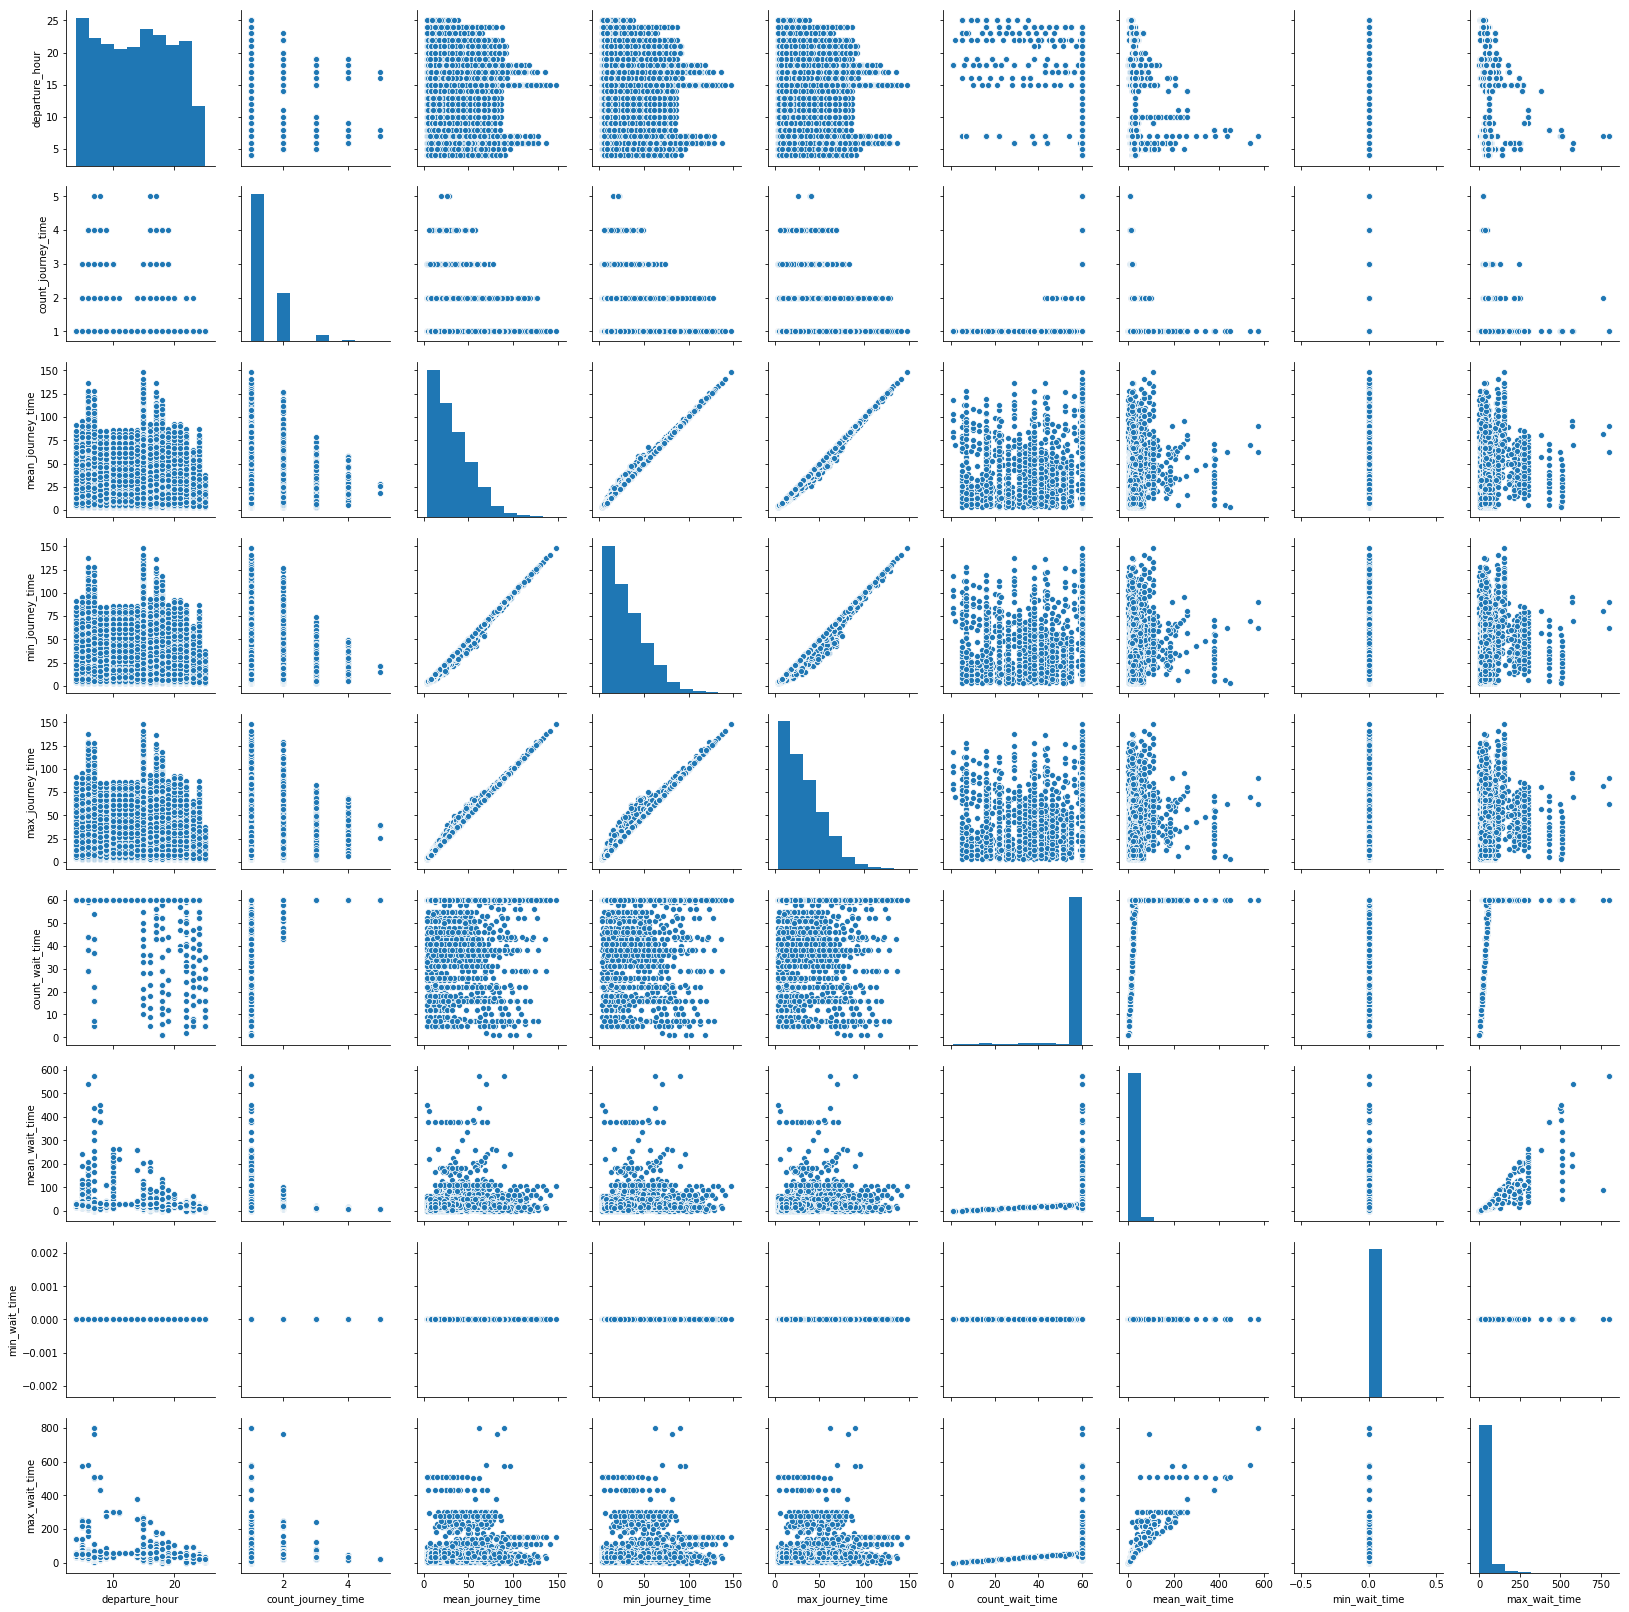

In [36]:
sns.pairplot(df_final)